# TP Final - Tópicos de Minería de Datos
### Juan Ignacio Farizano

--------------------------------------------------------------------------------

In [7]:
source("common.R")
library(janitor)

In [81]:
save.image("tpfinal.RData")

In [2]:
load("tpfinal.RData")

--------------------------------------------------------------------------------
## Sobre los datos

chamuyar acá

--------------------------------------------------------------------------------
## Preparación de los datos

In [42]:
# leo el dataset
csgo <- read.csv("csgo_round_snapshots.csv")
maps.names <- unique(csgo[,"map"])

# seed fija para el sample para tener resultados consistentes entre sesiones
set.seed(5403205) # numero random por google
# tomo una muestra porque el dataset es enorme
csgo <- csgo[sample(nrow(csgo), 2000),]
set.seed(NULL) # re-inicializo la seed

# declaro un pequeño dataset para ir guardando las columnas que vaya
# tratando
temp <- c()

# Creo 8 columnas, una para cada valor posible de "map" donde la convierto
# en 8 variables binarias
maps.column <- csgo[,"map"]
for (i in 1:length(maps.names)) {
  new.column <- double(nrow(csgo))
  new.column[maps.column == maps.names[i]] <- 1
  maps.names[i] <- paste("map_", maps.names[i], sep="")
  temp <- cbind(temp, new.column)
}

# convierto la variable binaria "bomb_planted" a numérica
bomb.column <- double(nrow(csgo))
bomb.column[csgo[,"bomb_planted"] == "True"] <- 1
temp <- cbind(temp, bomb.column)

colnames(temp) <- c(maps.names, "bomb_planted") # así cada columna tiene los nombres correctos


# separo en x e y, saco temporalmente las variables bomb_planted y map
# para escalar las demás variables numéricas y luegos las vuelvo a agregar
# con lo hecho anteriormente
x.csgo <- subset(csgo, select=-c(map, bomb_planted, round_winner))
y.csgo <- as.factor(csgo[,"round_winner"])

# escalo las variables numéricas
x.csgo[] <- lapply(x.csgo, scale)

# agrego las columnas tratadas
x.csgo <- cbind(x.csgo, temp)
# elimino las columnas que son constantes
x.csgo <- remove_constant(x.csgo, na.rm= TRUE)
csgo <- as.data.frame(cbind(x.csgo, y.csgo))

--------------------------------------------------------------------------------
## Análisis de variables

In [55]:
cat("\n-- Ranking de variables --\n")
cat("\n-- Forward ranking random forest --\n")
FORW.rf <- forward.ranking(x.csgo,y.csgo,method="rf.est" ,tot.trees=100,equalize.classes=F, verbosity=1)
cat("\n-- Forward ranking lda --\n")
FORW.lda <- forward.ranking(x.csgo,y.csgo,method="lda.est", verbosity=1)

cat("\n-- Backward ranking random forest --\n")
BACK.rf <- backward.ranking(x.csgo,y.csgo,method="rf.est" ,tot.trees=100,equalize.classes=F, verbosity=1)
cat("\n-- Backward ranking lda --\n")
BACK.lda <- backward.ranking(x.csgo,y.csgo,method="lda.est", verbosity=1)

cat("\n-- Kruskal-Wallis --\n")
KW <- kruskalwallis.ranking(x.csgo, y.csgo, verbosity = 1)

cat("\n-- RFE random forest --\n")
RFE.rf <- rfe.ranking(x.csgo,y.csgo,method="imp.rf", tot.trees=100, verbosity=1)
cat("\n-- RFE linear SVM --\n")
RFE.linsvm <- rfe.ranking(x.csgo,y.csgo,method="imp.linsvm", verbosity=1)


-- Ranking de variables --

-- Forward ranking random forest --

---------
Final ranking  87  features.
Features:  t_helmets ct_armor ct_defuse_kits t_players_alive ct_weapon_ump45 ct_money t_weapon_mp7 ct_players_alive t_weapon_m4a4 ct_weapon_mac10 map_de_cache ct_weapon_mp7 t_money ct_weapon_aug ct_grenade_incendiarygrenade t_weapon_ssg08 t_weapon_galilar ct_weapon_awp ct_grenade_flashbang ct_grenade_molotovgrenade t_weapon_p2000 t_weapon_mp5sd ct_weapon_mp9 ct_weapon_cz75auto ct_weapon_fiveseven t_weapon_sawedoff t_grenade_incendiarygrenade bomb_planted ct_weapon_p250 ct_weapon_tec9 t_grenade_smokegrenade map_de_mirage t_weapon_sg553 ct_weapon_p2000 t_score ct_weapon_ssg08 t_grenade_decoygrenade t_weapon_glock t_grenade_flashbang ct_weapon_nova t_health map_de_dust2 map_de_vertigo t_weapon_aug ct_grenade_smokegrenade t_weapon_cz75auto ct_grenade_decoygrenade t_weapon_mac10 t_grenade_molotovgrenade ct_weapon_famas ct_weapon_xm1014 ct_helmets t_weapon_g3sg1 ct_weapon_usps ct_weapon_g

Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning mess


---------
Final ranking  87  features.
Features:  t_helmets ct_armor ct_defuse_kits t_grenade_smokegrenade ct_weapon_aug t_weapon_elite t_weapon_sawedoff ct_weapon_mac10 ct_weapon_ak47 t_weapon_mac10 t_weapon_tec9 ct_weapon_mp7 t_weapon_mp9 t_grenade_incendiarygrenade ct_grenade_molotovgrenade t_grenade_hegrenade t_weapon_g3sg1 map_de_train ct_weapon_mp5sd t_weapon_sg553 t_weapon_famas t_weapon_aug ct_weapon_scar20 ct_weapon_ssg08 ct_weapon_nova t_weapon_mp7 t_weapon_ssg08 ct_weapon_galilar t_weapon_p2000 ct_weapon_p250 t_weapon_fiveseven ct_grenade_decoygrenade ct_weapon_tec9 ct_weapon_mp9 t_weapon_mp5sd ct_weapon_glock ct_weapon_p2000 t_grenade_decoygrenade ct_weapon_xm1014 t_weapon_deagle t_weapon_m4a1s t_weapon_m4a4 map_de_nuke ct_grenade_incendiarygrenade ct_weapon_elite t_weapon_ump45 t_weapon_cz75auto ct_weapon_ump45 ct_weapon_mag7 map_de_cache t_weapon_p250 t_money map_de_mirage map_de_vertigo ct_weapon_m4a4 ct_weapon_awp t_grenade_molotovgrenade t_weapon_usps map_de_inferno c

Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning mess


---------
Final ranking  87  features.
Features:  t_helmets ct_armor t_grenade_molotovgrenade ct_weapon_m4a4 ct_weapon_mp9 t_weapon_deagle ct_weapon_aug ct_weapon_awp ct_weapon_cz75auto t_weapon_usps t_weapon_glock bomb_planted ct_weapon_usps t_weapon_p250 ct_weapon_deagle t_grenade_smokegrenade ct_grenade_smokegrenade ct_grenade_incendiarygrenade ct_weapon_sg553 map_de_vertigo time_left t_weapon_m4a4 t_weapon_ak47 t_weapon_cz75auto ct_weapon_ak47 ct_helmets ct_weapon_p250 ct_defuse_kits ct_money t_weapon_m4a1s ct_weapon_elite ct_weapon_p2000 ct_weapon_scar20 t_weapon_sg553 map_de_mirage t_weapon_g3sg1 t_weapon_elite ct_weapon_xm1014 map_de_cache map_de_dust2 ct_weapon_ssg08 t_grenade_flashbang t_weapon_p2000 ct_score map_de_overpass ct_grenade_hegrenade t_score t_grenade_hegrenade t_grenade_decoygrenade ct_grenade_flashbang ct_weapon_glock t_weapon_mp9 ct_health t_grenade_incendiarygrenade ct_players_alive t_money ct_grenade_decoygrenade map_de_inferno map_de_train t_weapon_ssg08 t_w

Al hacer una muestra más pequeña se borraron más columnas que en el dataset original tenían pocas
filas con valores no nulos

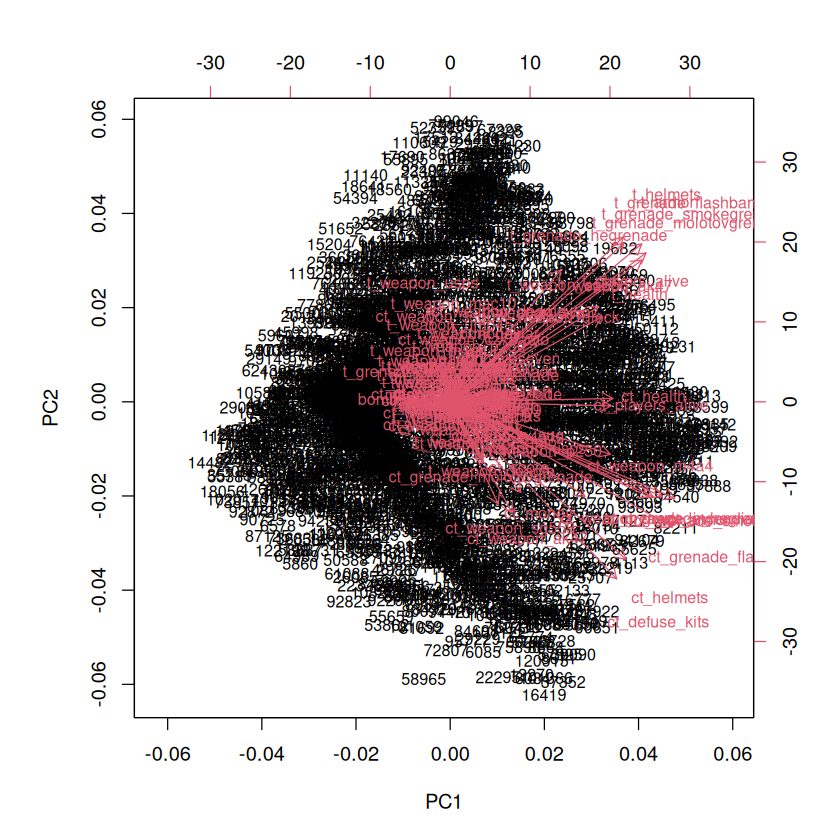

In [67]:
x.csgo.pca <- prcomp(x.csgo)
biplot(x.csgo.pca,cex=0.8)
x.csgo.pca <- x.csgo.pca$x[,1:30] # Agarro las primeras 30 componentes para ir más rápido
csgo.pca <- as.data.frame(cbind(x.csgo.pca, y.csgo))
csgo.pca$y.csgo <- as.factor(csgo.pca$y.csgo) #tuve que hacerle as.factor de vuelta porque por algún motivo se rompía
names.pca <- c(colnames(x.csgo.pca), "y.csgo")
colnames(csgo.pca) <- names.pca #hago esto porque después "y" queda con nombre V31 o cualquier otro

--------------------------------------------------------------------------------
## Clustering

### Cantidad de clusters

In [20]:
cat("---- Gap statistic ----\n")
cc.statis <- gap.statistic(x.csgo.pca, 10, 100)
cat("K recomendado por gap: ", cc.statis$best.k,"\n")

---- Gap statistic ----
K recomendado por gap:  7 


In [83]:
cat("\n---- Stability ----\n")
cc.stabil <- stability(x.csgo.pca, 10, 50)
sorted <- cc.stabil$sorted
cumulative <- cc.stabil$cumulative


---- Stability ----


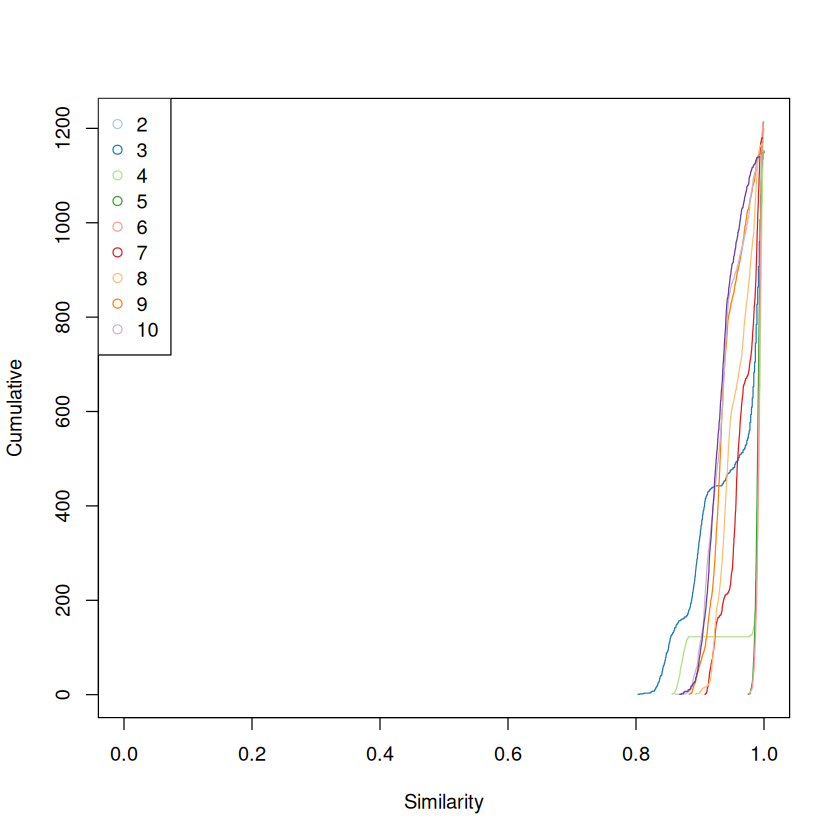

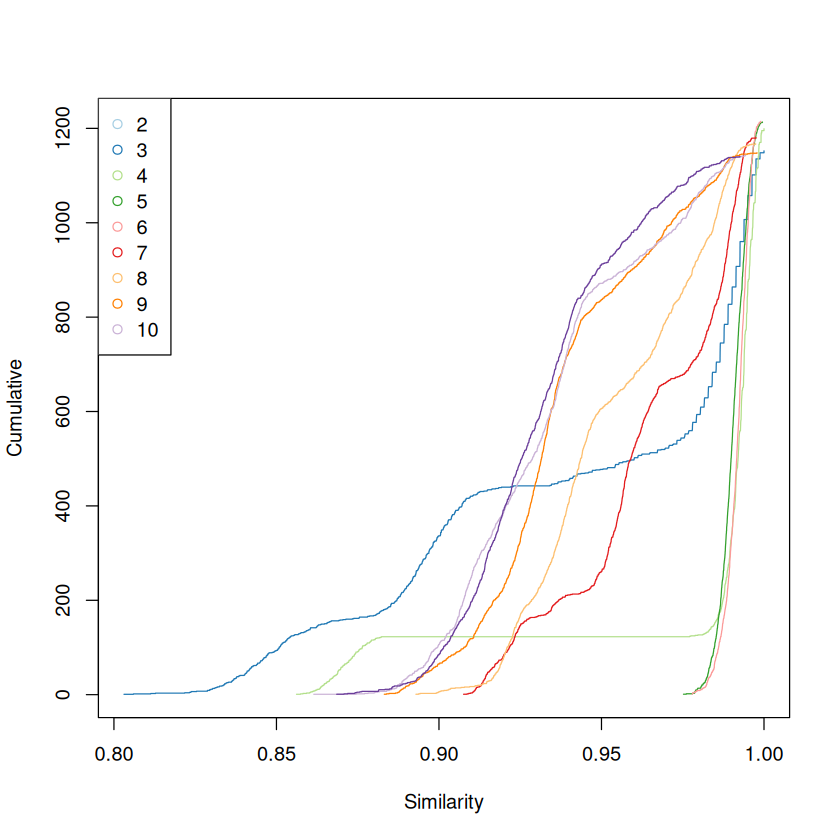

In [86]:
# cell aparte porque stability tarda una hora
cl <- brewer.pal(n = 10, name = "Paired")

plot(0,0,xlim = c(0,1),ylim=c(0, max(unlist(lapply(cumulative[-1], max)))),type = "n", xlab="Similarity", ylab="Cumulative")
legend("topleft", legend = 2:10, col=cl, pch=1)
for (i in 2:10){
    lines(sorted[[i]], cumulative[[i]], col = cl[i],type = 's')
}

plot(0,0,xlim = c(min(unlist(lapply(sorted[-1], min))),1),ylim=c(0, max(unlist(lapply(cumulative[-1], max)))),type = "n", xlab="Similarity", ylab="Cumulative")
legend("topleft", legend = 2:10, col=cl, pch=1)
for (i in 2:10){
    lines(sorted[[i]], cumulative[[i]], col = cl[i],type = 's')
}

### Clusterizando

cc <- kmeans(x.csgo.pca, cent=2, nstart=50, iter.max=30)
compare.clusters(y.csgo, cc$cluster)

--------------------------------------------------------------------------------
## Clasificación

In [43]:
# Creo los folds
indexData <- createFolds(t(y.csgo), k = 5)

#### Random Forest


 -- mtry con menor error -> 21 y error: 0.2574  --


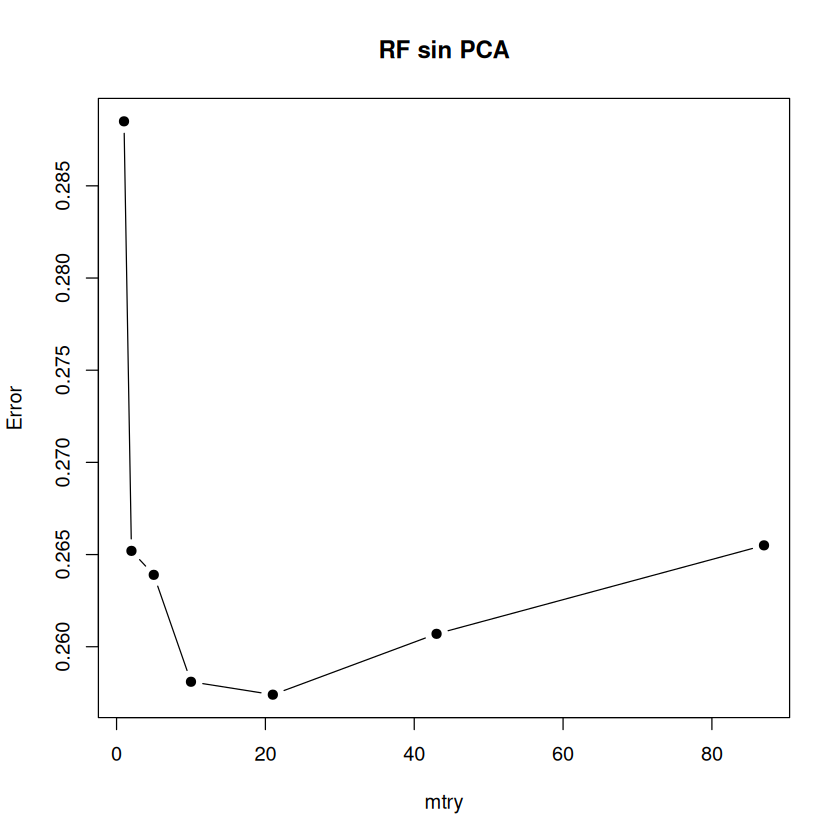

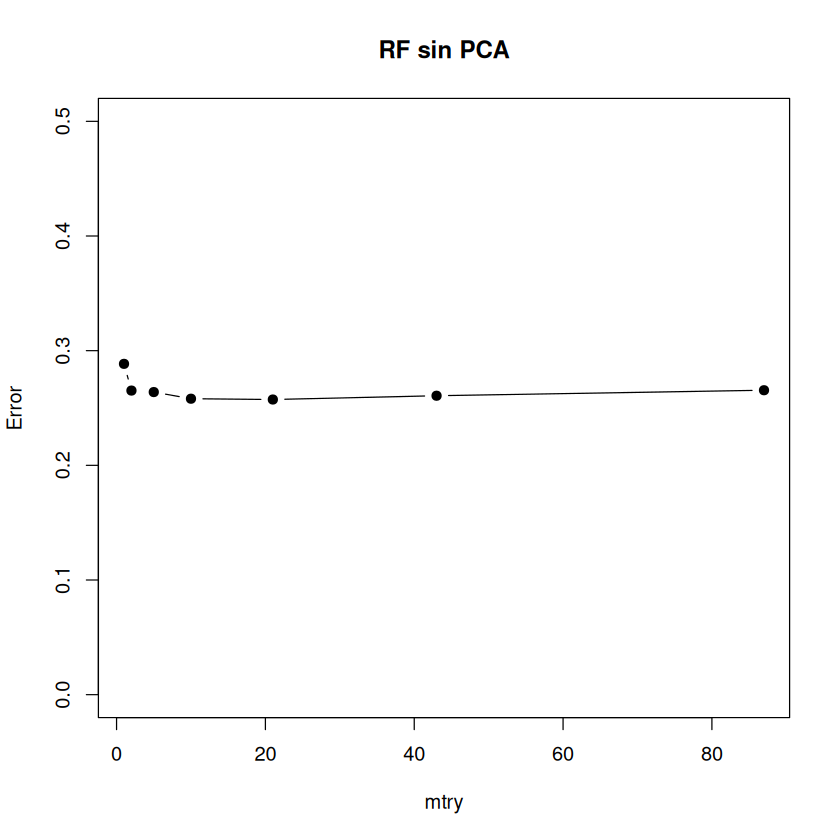

In [44]:
features_count <- ncol(csgo) - 1
m_values <- 0:floor(log(features_count, 2))
m_values <- floor(features_count / (2 ^ m_values))
m_errors <- double(length(m_values))

for (i in 1:length(m_errors)) {
  m <- m_values[i]

  for (j in 1:5) {
    csgo.rf <- randomForest(y.csgo ~ ., data=csgo, ntree=1000, mtry=m)
    m_errors[i] <- m_errors[i] + csgo.rf$err.rate[1000]
  }
}

m_errors <- m_errors / 5
cat("\n -- mtry con menor error ->", m_values[which.min(m_errors)], "y error:", m_errors[which.min(m_errors)] ," --\n")
plot(m_values, m_errors, type = "b", pch=19, main="RF sin PCA" ,xlab="mtry", ylab="Error")
plot(m_values, m_errors, type = "b", pch=19, main="RF sin PCA" ,xlab="mtry", ylab="Error", ylim=c(0, 0.5))


 -- mtry con menor error -> 3 y error: 0.2843  --


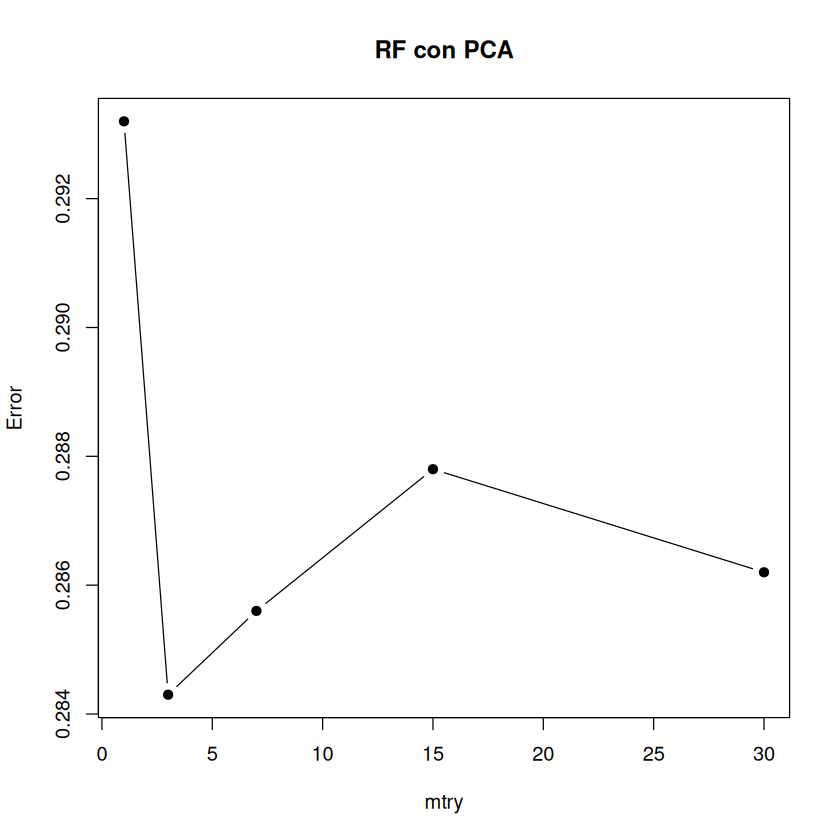

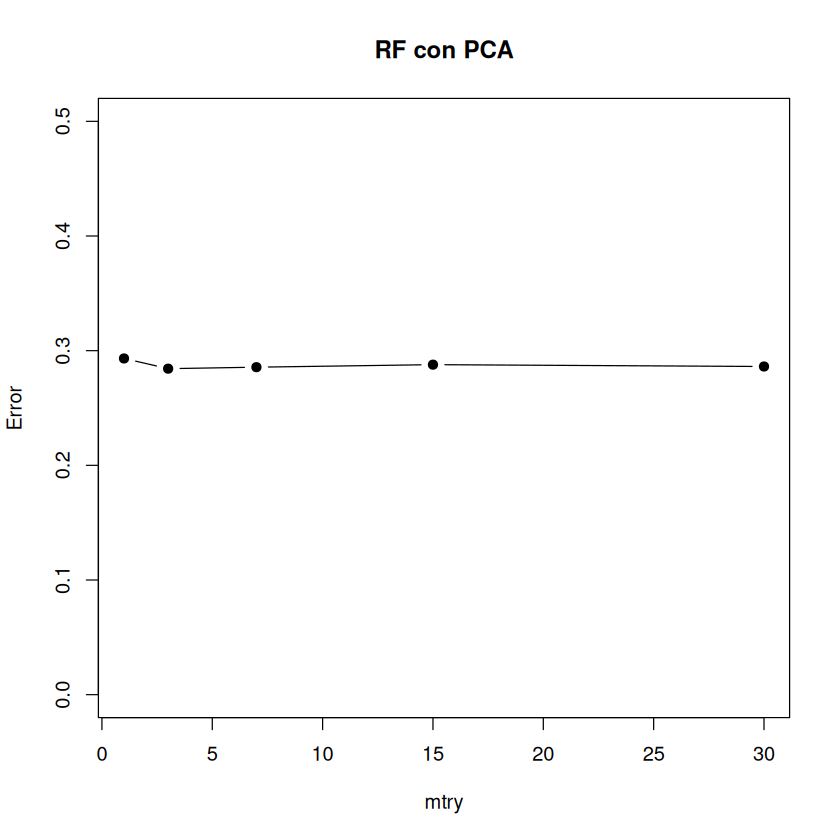

In [69]:
features_count <- ncol(csgo.pca) - 1
m_values <- 0:floor(log(features_count, 2))
m_values <- floor(features_count / (2 ^ m_values))
m_errors <- double(length(m_values))

for (i in 1:length(m_errors)) {
  m <- m_values[i]

  for (j in 1:5) {
    csgo.rf <- randomForest(y.csgo ~ ., data=csgo.pca, ntree=1000, mtry=m)
    m_errors[i] <- m_errors[i] + csgo.rf$err.rate[1000]
  }
}

m_errors <- m_errors / 5
cat("\n -- mtry con menor error ->", m_values[which.min(m_errors)], "y error:", m_errors[which.min(m_errors)] ," --\n")
plot(m_values, m_errors, type = "b", pch=19, main="RF con PCA", xlab="mtry", ylab="Error")
plot(m_values, m_errors, type = "b", pch=19, main="RF con PCA", xlab="mtry", ylab="Error", ylim=c(0, 0.5))

#### Adaboost

In [75]:
error <- 0

# Robado de IIA
for (kFold in 1:5) {
  foldTrain <- csgo[setdiff(seq(1:dim(csgo)[1]), indexData[[kFold]]), ]
  foldTest <- csgo[indexData[[kFold]], ]

  # tuve que sacar el argumento de control para maxdepth porque se rompía.
  # Al haber tantas variables para tan pocos datos hay problemas con la creación
  # de árboles que hace rpart, o algo así leí
  lamp.adaboost <- boosting(y.csgo ~ ., data = foldTrain, mfinal = 200, coef = "Freund")
  pred <- predict(lamp.adaboost, newdata = foldTest, type = "class");
  error <- error + pred$error
}

error <- error / 5

cat("\n -- Error ->", error, " --\n")


 -- Error -> 0.2785032  --


In [74]:
error <- 0

# Robado de IIA
for (kFold in 1:5) {
  foldTrain <- csgo.pca[setdiff(seq(1:dim(csgo.pca)[1]), indexData[[kFold]]), ]
  foldTest <- csgo.pca[indexData[[kFold]], ]

  # tuve que sacar el argumento de control para maxdepth porque se rompía.
  # Al haber tantas variables para tan pocos datos hay problemas con la creación
  # de árboles que hace rpart, o algo así leí
  lamp.adaboost <- boosting(y.csgo ~ ., data = foldTrain, mfinal = 200, coef = "Freund")
  pred <- predict(lamp.adaboost, newdata = foldTest, type = "class");
  error <- error + pred$error
}

error <- error / 5

cat("\n -- Error ->", error, " --\n")


 -- Error -> 0.2855045  --


#### SVM

In [80]:
# Tune ya tiene para realizar cross-validation, no voy a estar usando los folds
# que usé anteriormente pero esto queda más cómodo y eficiente
tc <- tune.control(cross = 5)
svmtune <- tune(svm, y.csgo ~., data=csgo.pca, 
                ranges=list(kernel=c("linear", "polynomial", "radial", "sigmoid"), gamma=2^(-10:1),cost=2^(1:8)),
                tunecontrol = tc)

In [82]:
svmtune


Parameter tuning of ‘svm’:

- sampling method: 5-fold cross validation 

- best parameters:
 kernel        gamma cost
 radial 0.0009765625   16

- best performance: 0.278 
